# 3D Gaussian Splatting

Before starting, go to `Runtime -> Change Runtime Type` and set Hardware Acceslerator to `T4 GPU` (or something similar).

The developed Gaussian Splatting project ([here](https://github.com/graphdeco-inria/gaussian-splatting)) is not compatible with Colab default settings. So, first we have to setup the environment:
1. Python 3.7
2. CUDA 11.8 toolkit
3. PyTorch 1.12.1+cu116

## Install Python 3.7

In [ ]:
!wget -O mini.sh https://repo.anaconda.com/miniconda/Miniconda3-py37_23.1.0-1-Linux-x86_64.sh
!chmod +x mini.sh
!bash ./mini.sh -b -f -p /usr/local
!conda install -q -y python=3.7
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages')
!python --version  # Should say Python 3.7.x

--2025-12-19 16:38:55--  https://repo.anaconda.com/miniconda/Miniconda3-py37_23.1.0-1-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.191.158, 104.16.32.241, 2606:4700::6810:bf9e, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.191.158|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 90665082 (86M) [application/x-sh]
Saving to: ‘mini.sh’

mini.sh             100%[===================>]  86.46M   132MB/s    in 0.7s    

2025-12-19 16:38:56 (132 MB/s) - ‘mini.sh’ saved [90665082/90665082]

PREFIX=/usr/local
Unpacking payload ...
                                                                                                
Installing base environment...





Preparing transaction: - done
Executing transaction: | / done
installation finished.
    You currently have a PYTHONPATH environment variable set. This may cause
    unexpected behavior when running the Python interpreter in Miniconda3.
    For best results, plea

## Install CUDA 11.8

In [ ]:
!wget https://developer.download.nvidia.com/compute/cuda/11.8.0/local_installers/cuda_11.8.0_520.61.05_linux.run
!chmod +x cuda_11.8.0_520.61.05_linux.run
!./cuda_11.8.0_520.61.05_linux.run --silent --toolkit --no-drm --no-man-page
import os
os.environ['PATH'] += ':/usr/local/cuda-11.8/bin'
os.environ['LD_LIBRARY_PATH'] = '/usr/local/cuda-11.8/lib64:/usr/lib64-nvidia'
!nvcc --version  # Should show CUDA 11.8

--2025-12-19 16:46:08--  https://developer.download.nvidia.com/compute/cuda/11.8.0/local_installers/cuda_11.8.0_520.61.05_linux.run
Resolving developer.download.nvidia.com (developer.download.nvidia.com)... 23.59.88.196, 23.59.88.194, 23.59.88.206, ...
Connecting to developer.download.nvidia.com (developer.download.nvidia.com)|23.59.88.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4336730777 (4.0G) [application/octet-stream]
Saving to: ‘cuda_11.8.0_520.61.05_linux.run.1’

cuda_11.8.0_520.61. 100%[===================>]   4.04G  61.0MB/s    in 80s     

2025-12-19 16:47:28 (51.8 MB/s) - ‘cuda_11.8.0_520.61.05_linux.run.1’ saved [4336730777/4336730777]

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


## Install Pytorch

In [ ]:
!pip uninstall torch torchvision torchaudio -y
!pip install torch==1.12.1+cu116 torchvision==0.13.1+cu116 torchaudio==0.12.1 --extra-index-url https://download.pytorch.org/whl/cu116

Found existing installation: torch 1.12.1+cu116
Uninstalling torch-1.12.1+cu116:
  Successfully uninstalled torch-1.12.1+cu116
Found existing installation: torchvision 0.13.1+cu116
Uninstalling torchvision-0.13.1+cu116:
  Successfully uninstalled torchvision-0.13.1+cu116
Found existing installation: torchaudio 0.12.1+cu116
Uninstalling torchaudio-0.12.1+cu116:
  Successfully uninstalled torchaudio-0.12.1+cu116
Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu116
  Using cached https://download.pytorch.org/whl/cu116/torch-1.12.1%2Bcu116-cp37-cp37m-linux_x86_64.whl (1904.8 MB)
  Using cached https://download.pytorch.org/whl/cu116/torchvision-0.13.1%2Bcu116-cp37-cp37m-linux_x86_64.whl (23.5 MB)
  Using cached https://download.pytorch.org/whl/cu116/torchaudio-0.12.1%2Bcu116-cp37-cp37m-linux_x86_64.whl (3.8 MB)


In [ ]:
import torch
print(torch.cuda.is_available())  # Should be True
print(torch.version.cuda)        # Should be 11.3 (from PyTorch)
print(torch.cuda.get_device_name(0))  # Should show GPU
!nvidia-smi

True
12.6
Tesla T4
Fri Dec 19 17:02:06 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   34C    P8              9W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+----------------------------

## Clone the Guassian Splatting [repository](https://github.com/camenduru/gaussian-splatting)

In [ ]:
%cd /content
!git clone --recursive https://github.com/camenduru/gaussian-splatting
!pip install -q plyfile

%cd /content/gaussian-splatting
!pip install -q /content/gaussian-splatting/submodules/diff-gaussian-rasterization
!pip install -q /content/gaussian-splatting/submodules/simple-knn

/content
Cloning into 'gaussian-splatting'...
remote: Enumerating objects: 603, done.
remote: Total 603 (delta 0), reused 0 (delta 0), pack-reused 603 (from 1)
Receiving objects: 100% (603/603), 2.09 MiB | 6.14 MiB/s, done.
Resolving deltas: 100% (344/344), done.
Submodule 'SIBR_viewers' (https://gitlab.inria.fr/sibr/sibr_core) registered for path 'SIBR_viewers'
Submodule 'submodules/diff-gaussian-rasterization' (https://github.com/graphdeco-inria/diff-gaussian-rasterization) registered for path 'submodules/diff-gaussian-rasterization'
Submodule 'submodules/simple-knn' (https://gitlab.inria.fr/bkerbl/simple-knn.git) registered for path 'submodules/simple-knn'
Cloning into '/content/gaussian-splatting/SIBR_viewers'...
remote: Enumerating objects: 3293, done.        
remote: Counting objects: 100% (322/322), done.        
remote: Compressing objects: 100% (174/174), done.        
remote: Total 3293 (delta 171), reused 280 (delta 148), pack-reused 2971 (from 1)        
Receiving objects: 

## Copy COLMAP Results to GS environment
Replace the path with your image path (```/content/drive/MyDrive/COLMAP Results```)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!cp -r "/content/drive/MyDrive/COLMAP Results" "/content"

!mkdir -p /content/project/undistorted/sparse/0
!mv /content/project/undistorted/sparse/*.bin /content/project/undistorted/sparse/0/

Mounted at /content/drive


## Start training the GS

In [ ]:
!python train.py -s /content/project/undistorted/

In [ ]:
!python render.py \
  -s /content/project/undistorted \
  -m /content/gaussian-splatting/output/ec6fd63d-9

Looking for config file in /content/gaussian-splatting/output/ec6fd63d-9/cfg_args
Config file found: /content/gaussian-splatting/output/ec6fd63d-9/cfg_args
Rendering /content/gaussian-splatting/output/ec6fd63d-9
Loading trained model at iteration 30000 [19/12 19:33:21]
Reading camera 20/20 [19/12 19:33:21]
Loading Training Cameras [19/12 19:33:21]
Loading Test Cameras [19/12 19:33:25]
Rendering progress: 100% 20/20 [00:28<00:00,  1.44s/it]
Rendering progress: 0it [00:00, ?it/s]


(np.float64(-0.5), np.float64(1599.5), np.float64(1195.5), np.float64(-0.5))

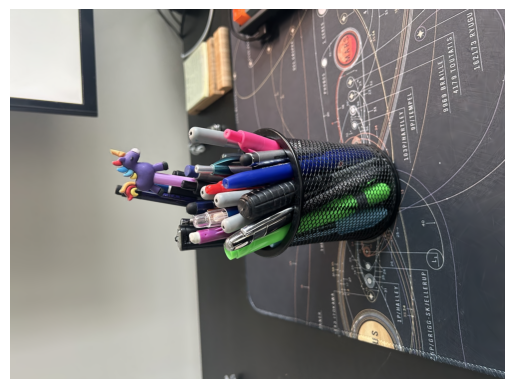

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import os

render_dir = "/content/gaussian-splatting/output/ec6fd63d-9/train/ours_30000/renders"
img = Image.open(os.path.join(render_dir, sorted(os.listdir(render_dir))[0]))

plt.imshow(img)
plt.axis("off")